In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds =pd.read_csv("Titanic-Dataset.csv")
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
ds.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ds.tail()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
ds.shape


(891, 12)

In [6]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
ds.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing values

In [8]:
ds.drop(columns='Cabin',axis=1,inplace=True)


In [9]:
Age=ds['Age'].mean()

In [10]:
ds['Age'].fillna(Age,inplace=True)

In [11]:
Fare=ds['Fare'].mean()

In [12]:
ds['Fare'].fillna(Fare,inplace=True)

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Data Visualization

In [15]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

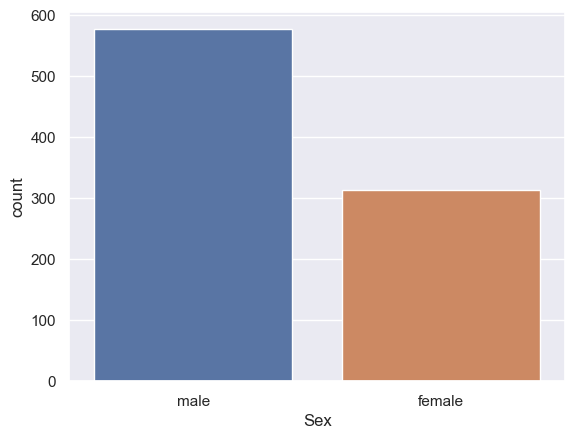

In [16]:
sns.countplot(x='Sex',data=ds)

In [17]:
ds['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

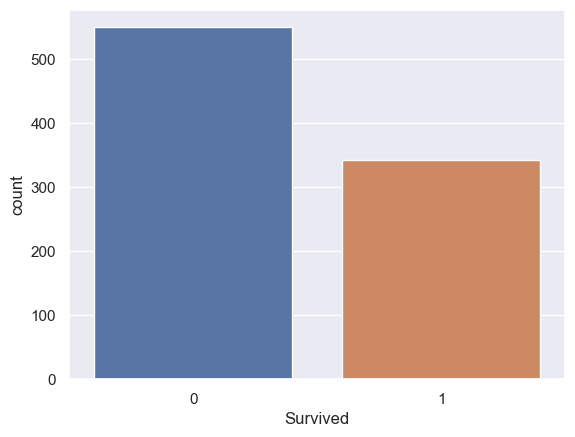

In [18]:
sns.countplot(x='Survived',data=ds)

<Axes: xlabel='Sex', ylabel='count'>

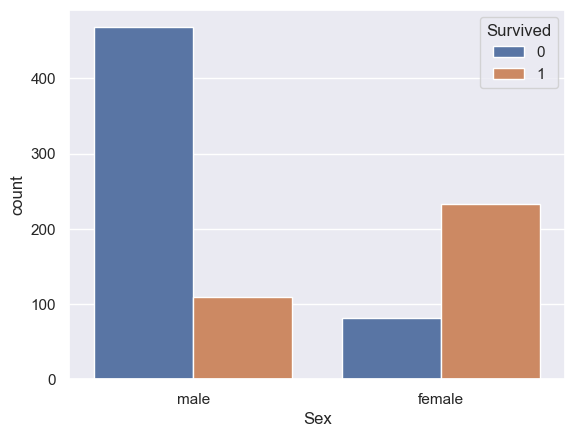

In [19]:
sns.countplot(x='Sex',hue='Survived',data=ds)

<Axes: xlabel='Pclass', ylabel='count'>

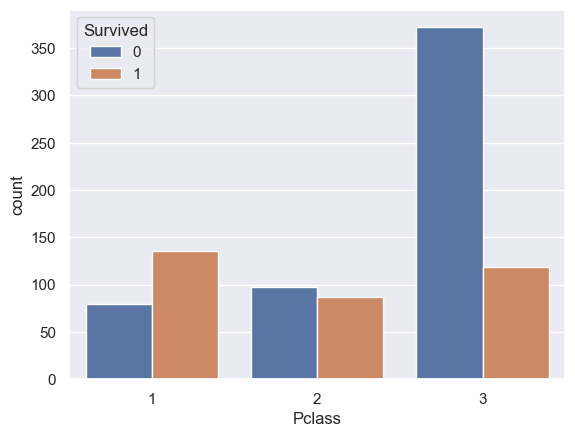

In [20]:
sns.countplot(x='Pclass',hue='Survived',data=ds)

In [21]:
ds[['Survived','Sex','Pclass']]

,Survived,Sex,Pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3
...,...,...,...
886,0,male,2
887,1,female,1
888,0,female,3
889,1,male,1


In [22]:
ds.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [23]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1.0


In [24]:
ds.drop(columns={'PassengerId','Name','Ticket'},axis=1,inplace=True)

In [25]:
ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,29.699118,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


# Separating features and target and Model training

In [26]:
X=ds.drop(columns='Survived',axis=1)
Y=ds['Survived']

In [27]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [30]:
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
model=LogisticRegression()

In [31]:
model.fit(X_train_imputed,Y_train)

LogisticRegression()

In [32]:
X_train_prediction=model.predict(X_train_imputed)
print(X_train_prediction)

[0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 1 1 

In [33]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.8047752808988764


In [34]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
print(X_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [36]:
X_test_imputed = imputer.transform(X_test)
X_test_prediction = model.predict(X_test_imputed)
print(X_test_prediction)

[0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0]


In [37]:
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of test data is:',testing_data_accuracy)

Accuracy score of test data is: 0.8100558659217877


In [38]:
test_data_precision=precision_score(Y_test,X_test_prediction)
print('Test data precision is:',test_data_precision)

Test data precision is: 0.803030303030303


In [39]:
test_data_recall=recall_score(Y_train,X_train_prediction)
print('Test data precision is:',test_data_precision)

Test data precision is: 0.803030303030303


In [40]:
test_data_recall=recall_score(Y_train,X_train_prediction)
print('Test data recall is:',test_data_recall)

Test data recall is: 0.6940298507462687


In [41]:
from sklearn import metrics

In [42]:
score=model.score(X_test_imputed,Y_test)
print(score)

0.8100558659217877


In [43]:
cm=metrics.confusion_matrix(Y_train,X_train_prediction)
print(cm)

[[387  57]
 [ 82 186]]


Text(0.5, 1.0, "('Accuracy Score:', 0.8100558659217877)")

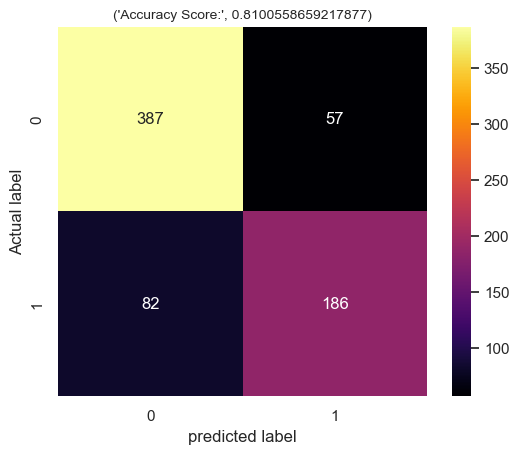

In [44]:
sns.heatmap(cm,annot=True,fmt='d',square=True,cmap="inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title=('Accuracy Score:',score)
plt.title(title,size=10)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_2=RandomForestClassifier(n_estimators=100)

In [47]:
model_2.fit(X_train_imputed,Y_train)

RandomForestClassifier()

In [48]:
X_test_pred=model_2.predict(X_test_imputed)

In [49]:
model_2.score(X_train_imputed,Y_train)
acc_score=round(model_2.score(X_test_imputed,Y_test)*100,2)
model_2_acc=accuracy_score(X_test_pred,Y_test)

In [50]:
model_2_acc

0.8324022346368715

In [51]:
acc_score

83.24

In [52]:
precision=precision_score(X_test_pred,Y_test)
recall=recall_score(X_test_pred,Y_test)
print(precision)
print(recall)

0.7297297297297297
0.84375


In [53]:
classification_report(X_test_pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.90      0.83      0.86       115\n           1       0.73      0.84      0.78        64\n\n    accuracy                           0.83       179\n   macro avg       0.82      0.83      0.82       179\nweighted avg       0.84      0.83      0.83       179\n'

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model_3=KNeighborsClassifier(n_neighbors=3)

In [56]:
model_3.fit(X_train_imputed,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
X_test_pred=model_3.predict(X_test_imputed)

In [58]:
model_3_acc=accuracy_score(X_test_pred,Y_test,normalize=True)

In [59]:
model_3_score=round(model_3.score(X_train_imputed,Y_train)*100,2)

In [60]:
model_3_precision=precision_score(X_test_pred,Y_test)
model_3_recall=recall_score(X_test_pred,Y_test)

In [61]:
model_3_score

83.57

In [62]:
model_3_acc

0.6871508379888268

In [63]:
print(model_3_precision)
print(model_3_recall)

0.47297297297297297
0.6730769230769231


In [64]:
classification_report(X_test_pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.84      0.69      0.76       127\n           1       0.47      0.67      0.56        52\n\n    accuracy                           0.69       179\n   macro avg       0.66      0.68      0.66       179\nweighted avg       0.73      0.69      0.70       179\n'

In [65]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [66]:
p1=model.predict([[3,0,22.0,1,0,7.2500,0]])
p2=model_2.predict([[3,0,22.0,1,0,7.2500,0]])
p3=model_3.predict([[3,0,22.0,1,0,7.2500,0]])
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


In [67]:
p1=model.predict([[2,0,27.0,0,0,13.00,0]])
p2=model_2.predict([[2,0,27.0,0,0,13.00,0]])
p3=model_3.predict([[2,0,27.0,0,0,13.00,0]])
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


We used three models to predict target variable which gave different accuracy and precision in each case